## <font color= 'brown'> Multiple Linear Regression
### <font color= 'Purple'>   Prediction of Bike Sharing Demand @ Sonal Hedaoo

### Problem Statement:

A bike_sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
    
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 






### 1. Importing Necessary libraries & files from dataset

In [2]:
#Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500) #in order to display all the columns in the dataset
pd.set_option('display.max_rows', 500) #in order to display all the rows in the dataset

In [4]:
#Importing necessary file for the dataset

BikeData = pd.read_csv('day.csv')

In [5]:
#head of dataset

BikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Insepcting the various aspects from the dataset

In [6]:
#inspecting number of rows and columns

BikeData.shape

(730, 16)

<font color= 'Purple'> Hence we know from the dataset, it has 730 rows and 16 columns

In [7]:
#inspecting null counts and data types of columns

BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#inspecting descriptive statistics for numeric columns

BikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<font color= 'Purple'> The difference between mean and median is not much, So it proves there is no outliers present in the dataset

In [9]:
#Checking percentages of missing values across all columns

BikeData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<font color= 'Purple'> Hence there are no null values

Now Dropping the least significant columns


In [10]:
# #Dropping the unwanted columns in dataframe, axis is taken as 1 since we are dropping the columns
#'instant' is an index column so we drop it , 'dteday' and 'year' - 'month' column are having same data so we can drop it 
#Dropping  'casual', 'registered' column as well

BikeData.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
BikeData.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#datatypes
BikeData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<font color= 'Purple'> Hence unwanted columns has been dropped

In [12]:
#Encoding/mapping  'season','mnth','weekday','weathersit' columns

BikeData.season = BikeData.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
BikeData.month = BikeData.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
BikeData.weekday = BikeData.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
BikeData.weathersit = BikeData.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [13]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#check for datatypes

BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### 3. Visualization of dataset

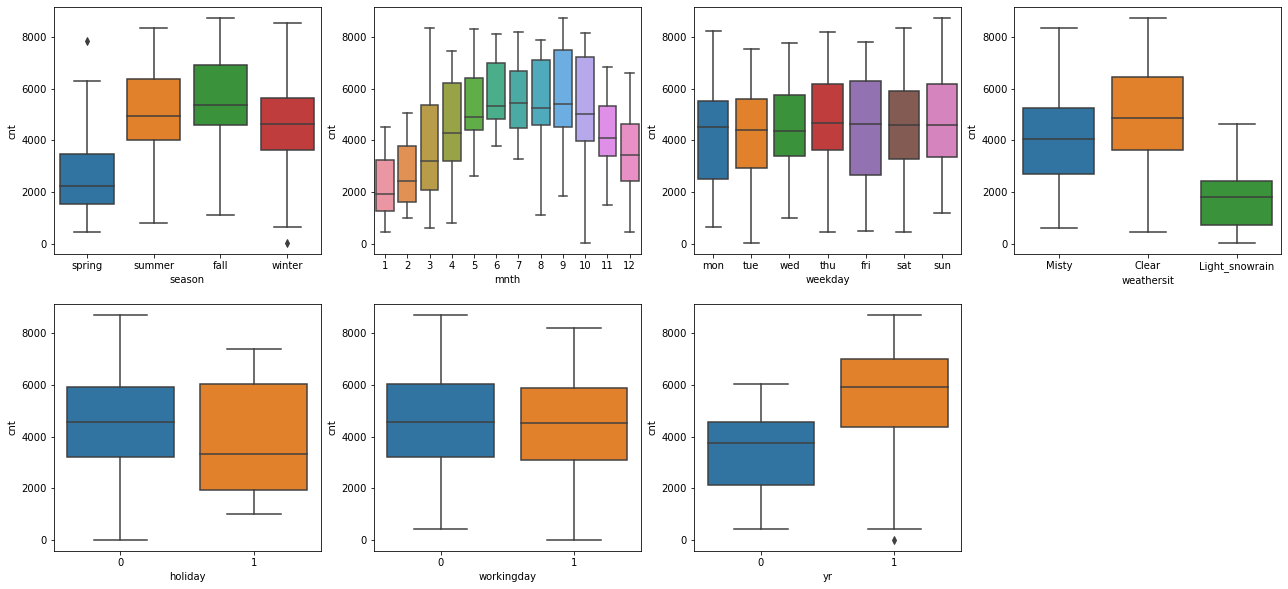

In [15]:
#Analysing predictor variable stands against the target variable
#visualizing the categorical columns


plt.figure(figsize=(22,10))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeData)

plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeData)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeData)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeData)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeData)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeData)

plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeData)

plt.show()



<font color= 'Purple'>-Mostly all day of week are equally rented , with slight variation of wednesday , thursday and friday.
    
-Most of the bookings has been done during the month of may, june, july, aug, sep and oct
    
-significantly higher rent in the year 2019 compare to 2018
    
-clear weather having high number rent
    
-Booking seemed to be similar on working day as well as non-working day
    
-2019 attracted more number of booking from the previous year, which shows good progress in terms of business
    
-majority of rent is in the mid of year 



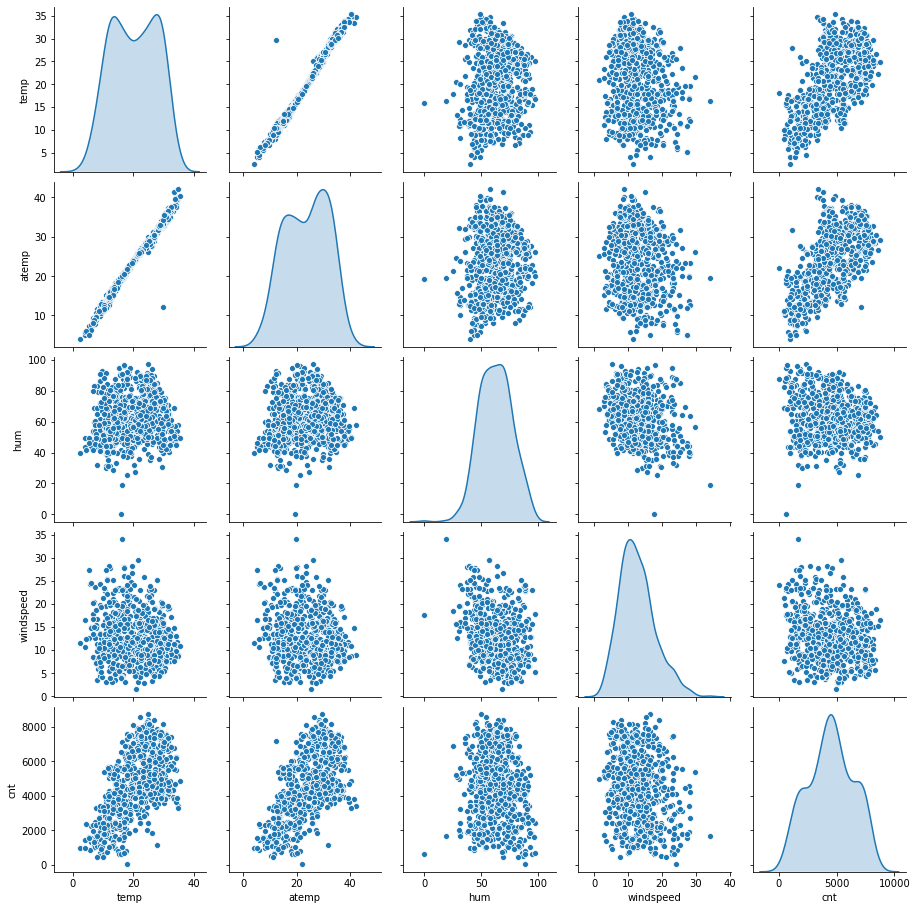

In [16]:
#Visualizing the Numeric variables
sns.pairplot(BikeData,vars = ['temp','atemp','hum','windspeed','cnt'],diag_kind='kde',palette='Dark2')

plt.show()

<font color= 'Purple'>- atemp, cnt and temp are linearly related, cause to multicollinearity

#### Correlation Matrix

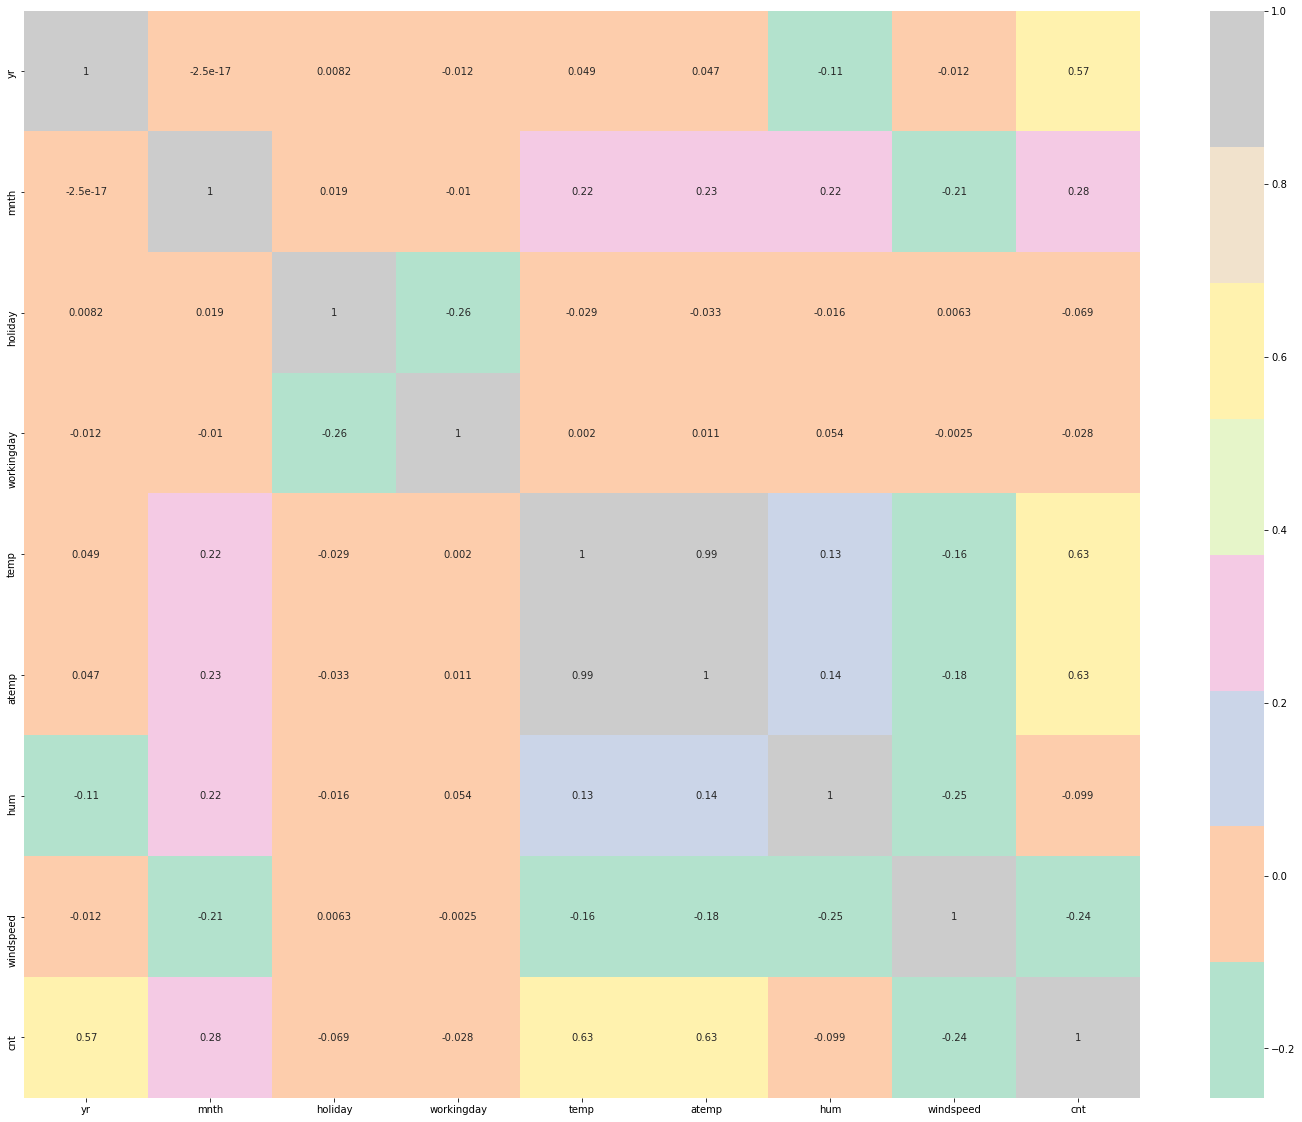

In [17]:
# correlation of numeric data to identify multicollinearity

plt.figure(figsize = (25,20))
sns.heatmap(BikeData.corr(), annot = True, cmap="Pastel2")
plt.show()


<font color= 'Purple'>-month and season are strongly correlated
    
<font color= 'Purple'>-target variable 'cnt' is highly corelated with 'yr', 'temp', 'atemp'
    
<font color= 'Purple'>-temp and atemp are highly correlated, so one of them should be dropped
    
<font color= 'Purple'>-weathersit and hum are in good correlation

### 4.Creating Dummy Variables

In [18]:
#first converting 'season','mnth','weekday','weathersit' columns to category datatype

BikeData['season']=BikeData['season'].astype('category')
BikeData['weathersit']=BikeData['weathersit'].astype('category')
BikeData['mnth']=BikeData['mnth'].astype('category')
BikeData['weekday']=BikeData['weekday'].astype('category')
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [19]:
#Dummy variable creation for 'month', 'weekday', 'weathersit' and 'season' variables

BikeData = pd.get_dummies(BikeData, drop_first=True)
BikeData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_2                     730 non-null    uint8  
 12  mnth_3                     730 non-null    uint8  
 13  mnth_4                     730 non-null    uint8  

In [20]:
#All Categorical Variable in the dataset 
BikeData = BikeData.select_dtypes(exclude=['float64','datetime64','int64'])
print(BikeData.columns)


Index(['season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')


In [21]:
#checking shape of dataset

BikeData.shape

(730, 22)

### 4. Splitting the data into Train and Test sets


In [1283]:
# create Train and Test dataset

from sklearn.model_selection import train_test_split

BikeData_train, BikeData_test = train_test_split(BikeData, train_size=0.7,test_size = 0.3, random_state=100)

In [1284]:
#checking info of Train dataset

BikeData_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   hum                        510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   season_spring              510 non-null    uint8  
 9   season_summer              510 non-null    uint8  
 10  season_winter              510 non-null    uint8  
 11  mnth_2                     510 non-null    uint8  
 12  mnth_3                     510 non-null    uint8  
 13  mnth_4                     510 non-null    uint8 

In [1285]:
#checking shape of Train dataset

BikeData_train.shape

(510, 30)

In [1286]:
#checking info of Test dataset

BikeData_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   hum                        219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   cnt                        219 non-null    int64  
 8   season_spring              219 non-null    uint8  
 9   season_summer              219 non-null    uint8  
 10  season_winter              219 non-null    uint8  
 11  mnth_2                     219 non-null    uint8  
 12  mnth_3                     219 non-null    uint8  
 13  mnth_4                     219 non-null    uint8 

In [1287]:
#checking info of Test dataset

BikeData_test.shape

(219, 30)

<font color= 'Purple'>So here we verified the info and shape of the dataset after split

#### Rescaling the features

In [1288]:
#using MinMaxScaler to Rescaling and checking the head of dataset

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

BikeData_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1289]:
#scaling the numeric variables

num = ['temp','atemp','hum','windspeed','cnt']
BikeData_train[num] = scaler.fit_transform(BikeData_train[num])

BikeData_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1290]:
#checking the data has been adjusted between min and max value

BikeData_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color= 'Purple'>So here we can observe that maximum value of rescaled variables are set as 1 and minimum are set as 0

### 5. Linear Model building

#### Divide data in X and Y sets

In [1291]:
#Dividing the data into X_train and y_train for model building

y_train = BikeData_train.pop('cnt')
X_train = BikeData_train


In [1292]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1293]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Data Modelling

In [1294]:
#Importing RFE and LinearRegression libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [1295]:
#Running RFE  to select top 15 variables

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train , y_train)

#List of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 14),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [1296]:
column = X_train.columns[rfe.support_]
column


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [1297]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [1298]:
#X test dataset with RFE variables

X_train_rfe = X_train[col]

#### Importing VIF

In [1299]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1300]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,29.50
2,temp,15.39
4,windspeed,4.77
5,season_spring,4.72
7,season_winter,4.33
6,season_summer,3.85
14,weathersit_Misty,2.29
0,yr,2.10
10,mnth_8,1.80
9,mnth_5,1.64


<font color= 'Purple'> Humidity has highest VIF

In [1301]:
#importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1302]:
import statsmodels.api as sm

#Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1)   #Create a first fitted model

lr1_model = lr1.fit()

lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.95e-189
Time:                        11:17:09   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2812      0.036      7.826      0.000       0.211       0.352
yr                            0.2304      0.008     28.506      0.000       0.215       0.246
holiday                      -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp                          0.4847      0.034     14.073      0.000       0.417       0.552
hum                          -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed                    -0.1836      0.026     -7.164      0.000      -0.234      -0.133
season_spring                -0.0436      0.023     -1.898      0.058      -0.089       0.002
season_summer                 0.0716      0.018      3.957      0.000       0.036       0.107
season_winter                 0.1098      0.020      5.458      0.000       0.070       0.149
mnth_3                        0.0333      0.015      2.269      0.024       0.004       0.062
mnth_5                        0.0307      0.018      1.717      0.087      -0.004       0.066
mnth_8                        0.0511      0.017      2.931      0.004       0.017       0.085
mnth_9                        0.1209      0.017      7.009      0.000       0.087       0.155
mnth_10                       0.0437      0.017      2.504      0.013       0.009       0.078
weathersit_Light_snowrain    -0.2445      0.026     -9.265      0.000      -0.296      -0.193
weathersit_Misty             -0.0558      0.010     -5.340      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = 'purple'> Where We are removing 'hum' variable first as it has High VIF and we will keep 'temp' variable as it looks important to the business

In [1303]:
X_train_rfe_new = X_train_rfe.drop(['hum'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values,i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.71
5,season_summer,3.05
4,season_spring,2.38
6,season_winter,2.31
0,yr,2.08
9,mnth_8,1.73
8,mnth_5,1.64
11,mnth_10,1.60
13,weathersit_Misty,1.58


In [1304]:
X_train_lm2 = sm.add_constant(X_train_rfe_new)

lr2 = sm.OLS(y_train, X_train_lm2)

lr2 = lr2.fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.03e-185
Time:                        11:17:11   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<font color = 'purple'>Where We have decided to remove/drop the 'mnth_5' variable as it has high P value.

In [1305]:
X_train_rfe_new1 = X_train_rfe_new.drop(['mnth_5'], axis=1)

In [1306]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new1.values,i) for i in range(X_train_rfe_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.62
5,season_summer,2.43
4,season_spring,2.35
6,season_winter,2.31
0,yr,2.07
8,mnth_8,1.73
10,mnth_10,1.60
12,weathersit_Misty,1.57
9,mnth_9,1.41


In [1307]:
X_train_lm3 = sm.add_constant(X_train_rfe_new1)

# Running and fitting the model
lr3 = sm.OLS(y_train, X_train_lm3)

lr3 = lr3.fit()

In [1308]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.33e-186
Time:                        11:17:14   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<font color = 'purple'> Now We have decided to remove/drop the 'mnth_3' variable as it has high P value.

In [1309]:
X_train_rfe_new2 = X_train_rfe_new1.drop(['mnth_3'], axis=1)

In [1310]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new2.values,i) for i in range(X_train_rfe_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.61
5,season_summer,2.38
6,season_winter,2.31
4,season_spring,2.17
0,yr,2.07
7,mnth_8,1.73
9,mnth_10,1.60
11,weathersit_Misty,1.57
8,mnth_9,1.41


In [1311]:
X_train_lm4 = sm.add_constant(X_train_rfe_new2)

lr4 = sm.OLS(y_train, X_train_lm4)

lr4 = lr4.fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.03e-187
Time:                        11:17:15   Log-Likelihood:                 500.63
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     497   BIC:                            -920.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

 <font color = 'purple'> Now We have decided to remove/drop the 'season_spring' variable as it has high P value.

In [1312]:
X_train_rfe_new3 = X_train_rfe_new2.drop(['season_spring'], axis=1)

In [1313]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new3.values,i) for i in range(X_train_rfe_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_winter,1.95
4,season_summer,1.82
8,mnth_10,1.60
6,mnth_8,1.59
10,weathersit_Misty,1.49
7,mnth_9,1.34
9,weathersit_Light_snowrain,1.09


In [1314]:
X_train_lm5 = sm.add_constant(X_train_rfe_new3)

lr5 = sm.OLS(y_train, X_train_lm5)

lr5 = lr5.fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.21e-187
Time:                        11:17:17   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<font color = 'purple'> Now We have decided to remove/drop the 'mnth_10' variable as it has high P value.

In [1315]:
X_train_rfe_new4 = X_train_rfe_new3.drop(['mnth_10'], axis=1)

In [1316]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new4.values,i) for i in range(X_train_rfe_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_summer,1.81
6,mnth_8,1.58
5,season_winter,1.49
9,weathersit_Misty,1.48
7,mnth_9,1.31
8,weathersit_Light_snowrain,1.08
1,holiday,1.04


In [1317]:
X_train_lm6 = sm.add_constant(X_train_rfe_new4)

lr6 = sm.OLS(y_train, X_train_lm6)

lr6 = lr6.fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.26e-187
Time:                        11:17:18   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<font color = 'purple'>Here We have to drop the 'mnth_8' variable

In [1318]:
X_train_rfe_new5 = X_train_rfe_new4.drop(['mnth_8'], axis=1)

In [1319]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new5.values,i) for i in range(X_train_rfe_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.56
8,weathersit_Misty,1.48
5,season_winter,1.38
6,mnth_9,1.20
7,weathersit_Light_snowrain,1.08
1,holiday,1.03


In [1320]:
X_train_lm7 = sm.add_constant(X_train_rfe_new5)

lr7 = sm.OLS(y_train, X_train_lm7)

lr7 = lr7.fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.37e-186
Time:                        11:17:19   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### <font color = 'purple'>We can observe that : 
    
 a. There is very low multicollinearity among the predictor variables
    
 b.VIF for all variables is less than 5
    
 c. The model is significantally fit as P values for all is 0.000
    
 d. R Squared and Adj R Squared also looks good at 83% and 82%
    
 e. F Statisitc is also good stating that the model is a good fit

### 6. Residual Ananlysis


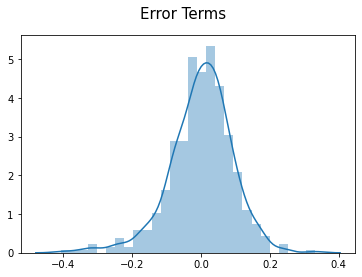

In [1321]:
#Residual Analysis of the train data and validation
y_train_pred = lr7.predict(X_train_lm7)

res = y_train - y_train_pred

# plot histogram of residual
figure = plt.figure()
figure.suptitle('Error Terms', fontsize = 15)
sns.distplot( res )
plt.show()


<font color = 'purple'>We can see that error terms are 0, residuals are normally distributed

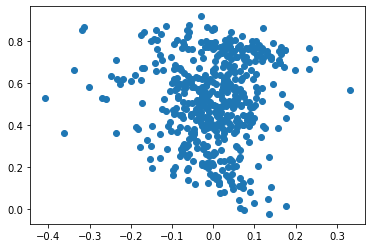

In [1322]:
#Checking error distribution having any pattern 

plt.figure()
plt.scatter(res, y_train_pred)
plt.show()


<font color = 'purple'>Here no pattern observed from above visualization


In [1323]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#### RMSE 

In [1324]:
#Checking RMSE of train dataset
np.sqrt(mean_squared_error(y_train,y_train_pred))



0.0922828230868249

<font color = 'purple'>RMSE value is less than 0.1 which is good

#### R-Square

In [1325]:
#Calculating the r-squared for train dataset
r_squared = r2_score(y_train,y_train_pred)
r_squared


0.8308378040041673

In [1326]:
#Calculating the Adj r-squared for train dataset

n = X_train.shape[0]

# p is the no of predictors
p = X_train.shape[1]

#Adj R square
adj_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adj_r_squared

0.8206175879960858

#### Prediction and Evaluation on the test dataset

In [1327]:
BikeData_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Rescaling test dataset

In [1328]:
columns = ['temp','atemp','hum','windspeed','cnt']

BikeData_test[columns] = scaler.transform(BikeData_test[cols])
BikeData_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1329]:
BikeData_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Divide data in X and Y sets

In [1330]:
y_test = BikeData_test.pop('cnt')
X_test = BikeData_test

In [1331]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1332]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [1333]:
# Using the same variables/columns as used in the final train model

coll = X_train_rfe_new5.columns
X_test = X_test[coll]

In [1334]:
#Adding a constant ro test dataset
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_9,weathersit_Light_snowrain,weathersit_Misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [1335]:
#predicting y_test

y_test_pred = lr7.predict(X_test_sm)

### Final Model Evaluation

#### checking normal distribution of residuals

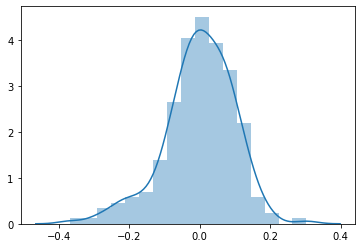

In [1336]:
res = y_test - y_test_pred
plt.figure()
sns.distplot(res)
plt.show()


<font color = 'purple'>We can see that error terms are 0, residuals are normally distributed  And The assumptions are also valid

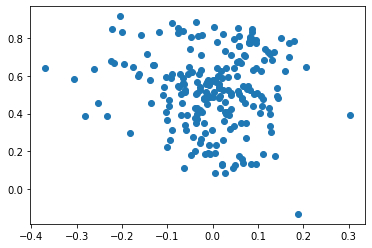

In [1337]:
#Checking error distribution having any pattern 


plt.figure()
plt.scatter(res, y_test_pred)
plt.show()

<font color = 'purple'>Here no pattern observed from above visualization

In [1338]:
#Checking RMSE of test dataset

np.sqrt(mean_squared_error(y_test,y_test_pred))



0.09895583956046229

In [1339]:
#Calculating the r-squared for test dataset
r_squared = r2_score(y_test,y_test_pred)
r_squared


0.7938290016640651

In [1340]:
#Calculating the Adj r-squared for test dataset

n = X_test.shape[0]

# p is the no of predictors
p = X_test.shape[1]

#Adj R square
adj_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adj_r_squared

0.7849508247022305

#### <font color = 'purple'>  We can see that the equation of our best fit line-

#### <font color = 'brown'> cnt = 0.1264 + 0.2328 x yr - 0.0992 x holiday + 0.5480 x temp - 0.1533 x windspeed + 0.0868 x season_summer + 0.1306 x season_winter + 0.1011 x mnth_9 - 0.2838 x weathersit_Light_snowrain - 0.0797 x weathersit_Misty

### 7. Conclusion

 #### <font color = 'purple'> Predictor Variables - 
    
 #### <font color = 'purple'>yr , temp, windspeed, season_summer, season_winter, mnth, weathersit_Light_snowrain, weathersit_Misty

Top 3 variables with +ve coefficients -
1. temp
2. yr
3. season_winter

So we can say that business demands increases if it's temp, season_winter and year.

Top 3 variables with -ve coefficients -

1. weathersit_Light_snowrain
2. windspeed
3. holiday

So we can say that business demands decreases if it's weathersit_Light_snowrain, windspeed and holiday.